# Funkcje

Funkcja to reguła lub przepis przypisujący każdemu elementowi z jednego zbioru (zwany dziedziną) dokładnie jeden element z innego zbioru (zwany zbiorem wartości). Istnieje wiele możliwości definiowania funkcji poniżej przedstawiamy kilka z nich.

In [42]:
import numpy as np
import sympy as sp
from sympy.plotting import plot_implicit
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [43]:
# plotting function
def plot_fun(f: list, a: float, b: float, label: list[str]):
    x = np.linspace(a, b, 100)
    for i in range(len(f)):
        plt.plot(x, f[i](x), label=label[i])
    plt.legend()
    plt.show()
    
# same with plotly
def plot_fun_plotly(f: list, a: float, b: float, label: list[str]):
    x = np.linspace(a, b, 100)
    fig = go.Figure()
    for i in range(len(f)):
        fig.add_trace(go.Scatter(x=x, y=f[i](x), mode='lines', name=label[i]))
    fig.show()

# Jawna definicja funkcji

In [44]:
# Funkcje R -> R
# f(x) = sin(x)+x oraz g(x) = x^2/10
f = lambda x: np.sin(x)+x
g = lambda x: x**2/10

plot_fun_plotly([f, g], -10, 10, ['f(x) = sin(x)+x', 'g(x) = x^2'])

In [45]:
# Funkcja R^2 -> R 
# f(x, y) = sin(x + y)
f = lambda x, y: np.sin(x + y)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
# zlim
fig.update_layout(scene = dict(zaxis = dict(nticks=4, range=[-2,2],),),)
fig.show()


# Funkcje uwikłane F(x,y) = 0

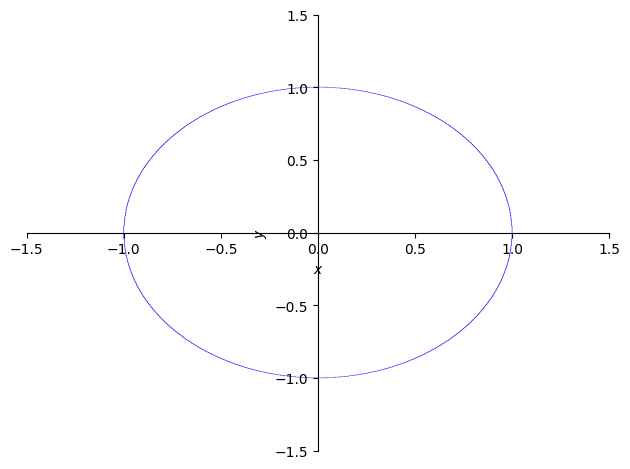

In [46]:
# Definiowanie symboli
x, y = sp.symbols('x y')

# Definiowanie równania uwikłanego
equation = x**2 + y**2 - 1

# Rysowanie równania uwikłanego
plot_implicit(sp.Eq(equation, 0), (x, -1.5, 1.5), (y, -1.5, 1.5));


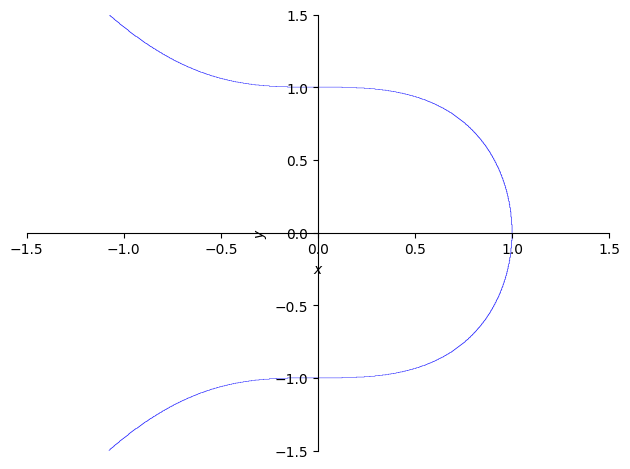

In [47]:
# Definiowanie równania uwikłanego
equation = x**3 + y**2 - 1

# Rysowanie równania uwikłanego
plot_implicit(sp.Eq(equation, 0), (x, -1.5, 1.5), (y, -1.5, 1.5));

# Przykład z fizyki

## Elektryczność: potencjał elektryczny dla dwóch ładunków punktowych.

Potencjał elektryczny V w punkcie (X, Y) wywołany przez dwa ładunki punktowe q1 i q2 w punktach r1 i r2 wynosi:

$$ V(X, Y) = \frac{k q1}{\sqrt{(X - r1_x)^2 + (Y - r1_y)^2}} + \frac{k q2}{\sqrt{(X - r2_x)^2 + (Y - r2_y)^2}} $$

In [48]:
import numpy as np
import plotly.graph_objects as go

def V(q1, q2, r1, r2):
    k = 8.99e9
    # Calculate distances for q1 and q2 from every point (X, Y)
    dist_r1 = np.sqrt((X - r1[0])**2 + (Y - r1[1])**2)
    dist_r2 = np.sqrt((X - r2[0])**2 + (Y - r2[1])**2)
    # Compute potential
    return k*q1/dist_r1 + k*q2/dist_r2

q1 = 1e-9
q2 = -1e-9
r1 = np.array([1, 0])
r2 = np.array([-1, 0])

# Generating the grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z for each (X, Y) point
Z = V(q1, q2, r1, r2)

# Plotting
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Electric Potential', autosize=False, width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


## Ruch w polu grawitacyjnym

Równanie ruchu w polu grawitacyjnym:
$$ x(t) = x_0 + v_{0x} t $$
$$ y(t) = y_0 + v_{0y} t - \frac{1}{2} g t^2 $$

gdzie:

- $x_0, y_0$ to współrzędne początkowe,
- $v_{0x}, v_{0y}$ to składowe prędkości początkowej,
- $g$ to przyspieszenie ziemskie.
- $t$ to czas.
- $x(t), y(t)$ to współrzędne w czasie $t$.


In [49]:
# Definicja funkcji
def x(t, x0, v0x):
    return x0 + v0x*t

def y(t, y0, v0y, g):
    return y0 + v0y*t - 0.5*g*t**2

# Parametry
x0 = 0
y0 = 10
v0x = 1
v0y = 1
g = 9.81

# Czas
t = np.linspace(0, 2, 100)

# Współrzędne
X = x(t, x0, v0x)
Y = y(t, y0, v0y, g)

# Plotting
fig = go.Figure(data=[go.Scatter(x=X, y=Y, mode='lines')])
fig.update_layout(title='Projectile Motion', xaxis_title='x', yaxis_title='y')
fig.show()
